#### KERAS 모델 구성 이해
- 모델 설계
- 모델 생성
- 모델 학습

In [2]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation

#### [1] 데이터 준비 <hr>

In [3]:
# 데이터 파일 -------------------------------------------
filename='../DATA/Iris.csv'

irisDF=pd.read_csv(filename)
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### [2] 훈련 데이터 준비 <hr>

In [4]:
data=irisDF[irisDF.columns[:-2]]
target=irisDF['petal_width']


In [5]:
print(f'data => {data.shape}, {data.ndim}차원')
print(f'target => {target.shape}, {target.ndim}차원\n')

print(f'0번행 데이터 ======>\n{data.iloc[0]}\n\n0번행 라벨 ======> {target[0]}')

data => (150, 3), 2차원
target => (150,), 1차원

0번행 데이터 ======>
sepal_length    5.1
sepal_width     3.5
petal_length    1.4
Name: 0, dtype: float64

0번행 라벨 ======> 0.2


#### [3] 모델 설계 <hr>

In [6]:
# 순차적 모델 인스턴스 생성
irisModel=Sequential(name='irisMODEL')

In [7]:
# 입력층
irisModel.add(Dense(10, input_shape=(3,), name='In'))
irisModel.add(Activation('relu'))

# 은닉층
irisModel.add(Dense(8, activation='relu', name='Hidd1'))
irisModel.add(Dense(6, activation='relu', name='Hidd2'))
irisModel.add(Dense(4, activation='relu', name='Hidd3'))

# 출력층
irisModel.add(Dense(1, activation='linear', name='Out'))

In [8]:
irisModel.summary()

Model: "irisMODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 In (Dense)                  (None, 10)                40        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 Hidd1 (Dense)               (None, 8)                 88        
                                                                 
 Hidd2 (Dense)               (None, 6)                 54        
                                                                 
 Hidd3 (Dense)               (None, 4)                 28        
                                                                 
 Out (Dense)                 (None, 1)                 5         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable par

### [4] 모델 생성 <hr>

In [12]:
# 모델을 컴파일합니다.
irisModel.compile(loss = 'mse', 
              optimizer = 'adam', 
              metrics = ['mae', 'mse'])

### [5] 학습 <hr>

In [13]:
from keras import callbacks 

In [14]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
      print('')
    print('.', end='')

In [15]:
EPOCHS = 500

history = irisModel.fit(data, target,
                        epochs = EPOCHS, 
                        validation_split = 0.2, 
                        verbose = 0,
                        callbacks = [PrintDot()])
print(f'\n학습 종료')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
학습 종료


#### [5-1] 모델 학습 과정 정보 확인 <hr>

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.497567,0.629899,0.497567,1.162102,1.042567,1.162102,495
496,0.497566,0.629855,0.497566,1.161252,1.042160,1.161252,496
497,0.497532,0.629790,0.497532,1.160770,1.041928,1.160770,497
498,0.497554,0.629754,0.497554,1.159832,1.041478,1.159832,498
499,0.497506,0.629677,0.497506,1.159322,1.041233,1.159322,499


In [17]:
epochs, values = hist['epoch'].values, hist['mae'].values

In [18]:
import matplotlib.pyplot as plt

def plot_history():
    
    plt.figure(figsize=(10, 12))
    
    plt.subplot(2, 1, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error  [MAE]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([0,5])
    plt.title("[MAE]")
    plt.legend()
    
    
    plt.subplot(2, 1, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MSE^2$]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([0,5])
    plt.title("[$MSE^2$]")
    plt.legend()
    plt.show()

In [ ]:
plot_history()

#### [5-2] 학습 - 조기종료 <hr>

In [ ]:
# patience 매개변수 : 성능 향상 체크할 에포크 횟수
EARLY_STOP = callbacks.EarlyStopping(monitor='val_loss', patience=10)
PRINT_DOT = PrintDot()
EPOCHS = 500

history = irisModel.fit(data, target, 
                        epochs=EPOCHS,
                        validation_split = 0.2, 
                        verbose=0, 
                        callbacks=[EARLY_STOP, PRINT_DOT])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
177,0.496980,0.625885,0.496980,1.112908,1.018702,1.112908,177
178,0.496992,0.625890,0.496992,1.112604,1.018552,1.112604,178
179,0.496993,0.625905,0.496993,1.113089,1.018790,1.113089,179
180,0.496982,0.625907,0.496982,1.112987,1.018740,1.112987,180
181,0.496976,0.625899,0.496976,1.112875,1.018685,1.112875,181


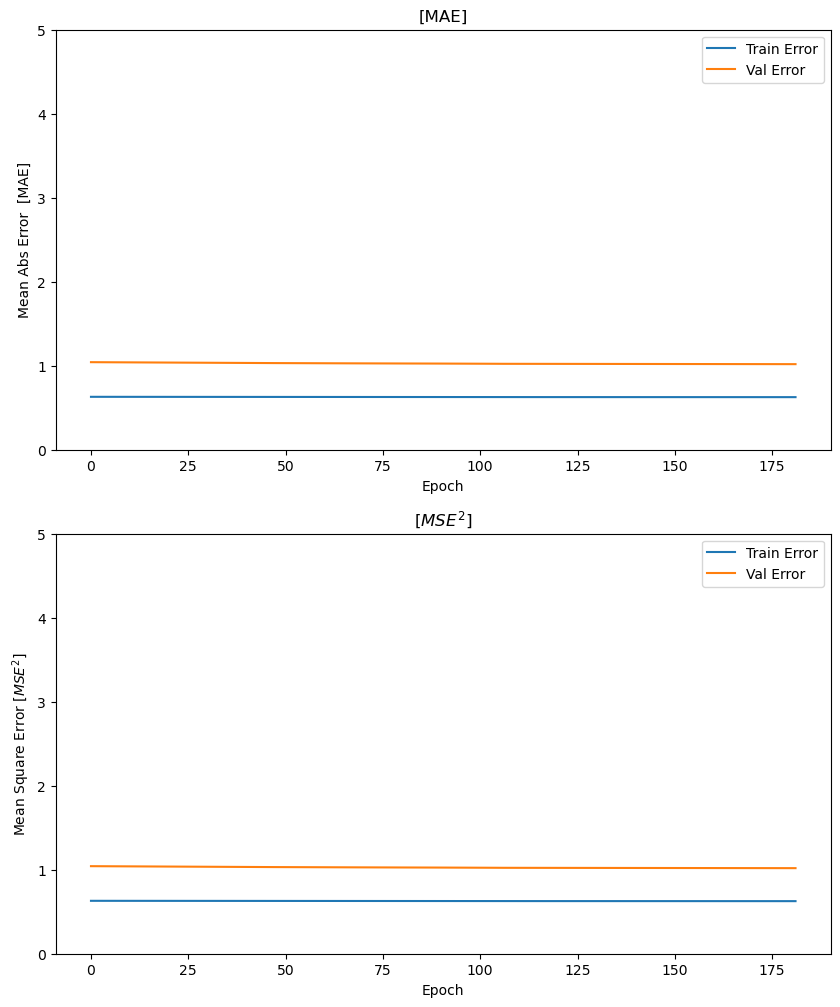

In [ ]:
plot_history()

#### [6] 평가 WITH 테스트 데이터 <hr>

In [ ]:
loss, mae, mse = irisModel.evaluate(data, target, verbose=1)

print(f"\n테스트 세트의 평균 절대 오차: {mae:5.2f}")

5/5 [==============================] - 0s 2ms/step - loss: 0.6202 - mae: 0.7045 - mse: 0.6202

테스트 세트의 평균 절대 오차:  0.70


#### [7] 예측 WITH 사용되지 않은 데이터 <hr>

5/5 [==============================] - 0s 0s/step
pre_ : [[0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.99464816]
 [0.9

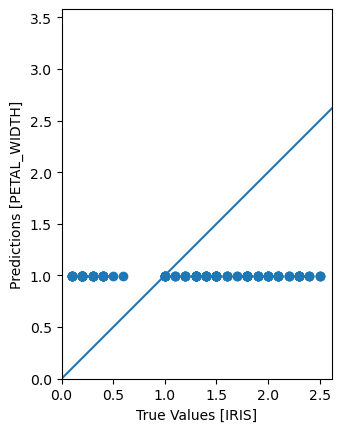

In [ ]:
pre_ = irisModel.predict(data)
print(f'pre_ : {pre_}')

plt.scatter(target, pre_)
plt.xlabel('True Values [IRIS]')
plt.ylabel('Predictions [PETAL_WIDTH]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [ ]:
### 모델 속성 정보 출력 함수 -----------------------------------------------------------
def display_info():
    # 모델 객체의 입력 텐서 정보 
    print(f'입력 텐서 정보 : {irisModel.inputs}\n')
    
    # 모델 객체의 출력 텐서 정보 
    print(f'출력 텐서 정보 : {irisModel.outputs}\n')
    
    # 모델 구성 층 객체 정보
    print(f'구성 층 정보 : {irisModel.layers}\ng')
    
    # 해당 층에 대한 정보 확인 => Model.layers 리스트로 인덱스 접근
    print(f'0번 층에 대한 weights 정보\n{irisModel.layers[0].weights}\n')
    
    # 모델 객체 전체에 대한 가중치
    print(f'모델 전체 층에 대한 weights 정보\n{irisModel.weights}\n')

In [ ]:
display_info()

입력 텐서 정보 : [<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'In_input')>]

출력 텐서 정보 : [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Out')>]

구성 층 정보 : [<keras.layers.core.dense.Dense object at 0x000001F250C06310>, <keras.layers.core.activation.Activation object at 0x000001F250C06550>, <keras.layers.core.dense.Dense object at 0x000001F250BF9FA0>, <keras.layers.core.dense.Dense object at 0x000001F250DEBCA0>, <keras.layers.core.dense.Dense object at 0x000001F250DF2B50>, <keras.layers.core.dense.Dense object at 0x000001F250E0BA90>]
g
0번 층에 대한 weights 정보
[<tf.Variable 'In/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[-0.44368   ,  0.31595397, -0.43562555, -0.47144228, -0.40412104,
         0.5957793 , -0.2993538 ,  0.39273316,  0.58320403, -0.19172795],
       [-0.22052324, -0.5296319 , -0.32401574, -0.12777883, -0.12252522,
        -0.60700583, -0.42839456, -0.29843655,  0.48404726,  0.56251776],
       [-0.3857168 , -0.515074  , -0.502772  , -0.5429

In [ ]:
# 현재 모델에 대한 설정을 모두 가져옮 => dict 타입
config_=irisModel.get_config()
for k, v in config_.items():
    print(f'{k} => {v}')
m3=Sequential.from_config(config_)
m3.summary()

name => irisMODEL
layers => [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'In_input'}}, {'class_name': 'Dense', 'config': {'name': 'In', 'trainable': True, 'batch_input_shape': (None, 3), 'dtype': 'float32', 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Activation', 'config': {'name': 'activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}}, {'class_name': 'Dense', 'config': {'name': 'Hidd1', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {

### [4] 모델 저장 및 로딩 <hr>

In [ ]:
###  모델 저장 => 구조+가중치 =>  *.h5/ .hdf5 / .keras
model_filename='../Models/iris_model.h5'
model_filename2='../Models/iris_model.keras'

irisModel.save(model_filename)
irisModel.save(model_filename2)

In [ ]:
###  모델 로딩
from keras.models import load_model

myModel2=load_model(model_filename2)
myModel2.summary()

Model: "irisMODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 In (Dense)                  (None, 10)                40        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 Hidd1 (Dense)               (None, 8)                 88        
                                                                 
 Hidd2 (Dense)               (None, 6)                 54        
                                                                 
 Hidd3 (Dense)               (None, 4)                 28        
                                                                 
 Out (Dense)                 (None, 1)                 5         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable par

In [ ]:
w_file ='./iris_weights'

# 저장 => iris_weights.data, iris_weights.index
irisModel.save_weights(w_file)

In [ ]:
# 가중치 로딩
irisModel.load_weights(w_file)